In [9]:
import numpy as np

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = np.array(bream_length + smelt_length)
fish_weight = np.array(bream_weight + smelt_weight)
fish_length

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ,  9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8, 11.8, 12. ,
       12.2, 12.4, 13. , 14.3, 15. ])

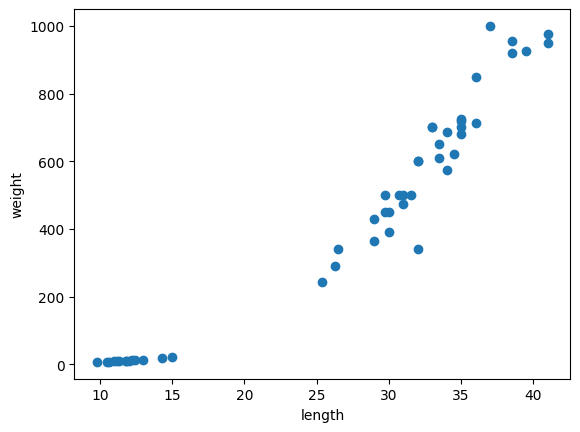

In [3]:
import matplotlib.pyplot as plt

plt.scatter(fish_length, fish_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_length, fish_weight, random_state=35)

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape)
print(test_input.shape)

(36, 1)
(13, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [8]:
#좋은 모델은 score가 train이 test보다 더 높아야 한다.
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.9607937182072068
0.9683152448509726


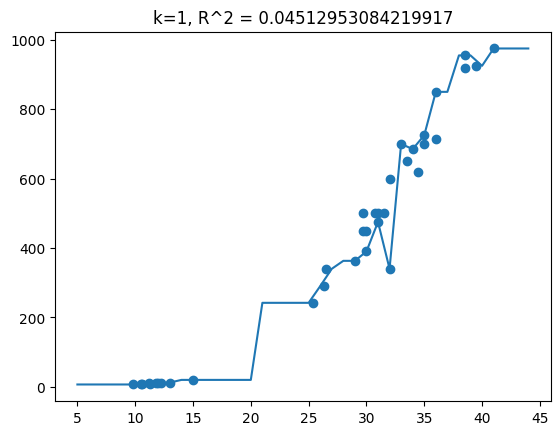

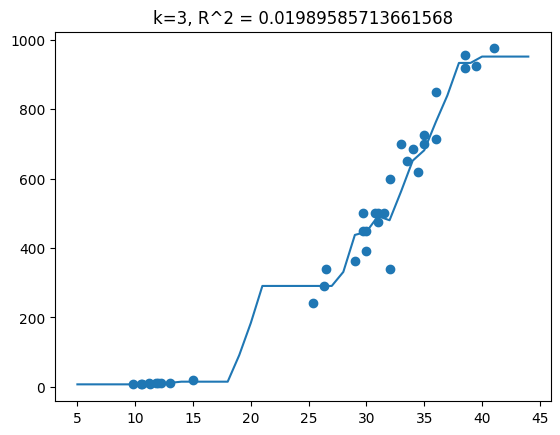

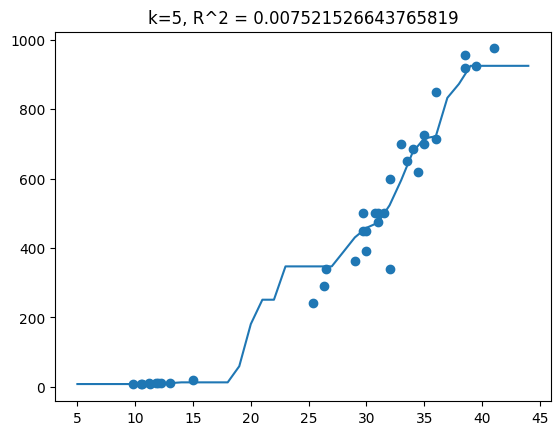

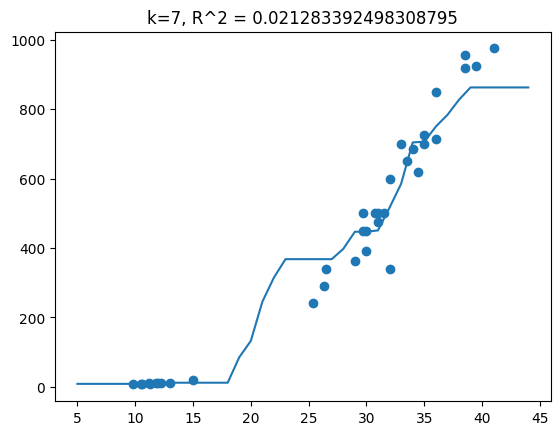

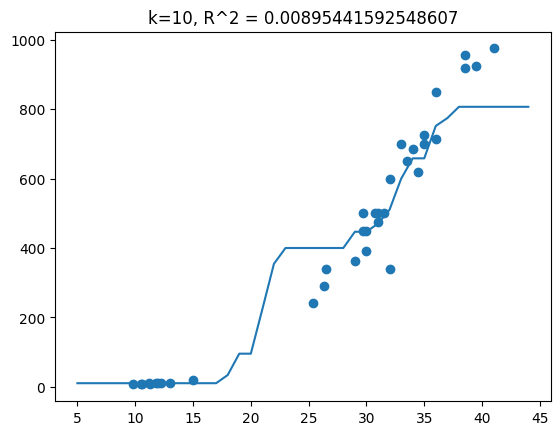

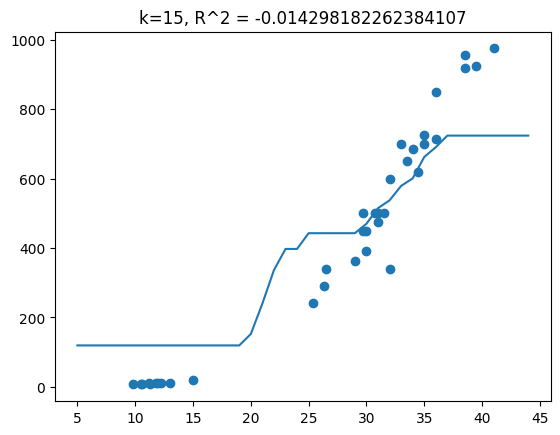

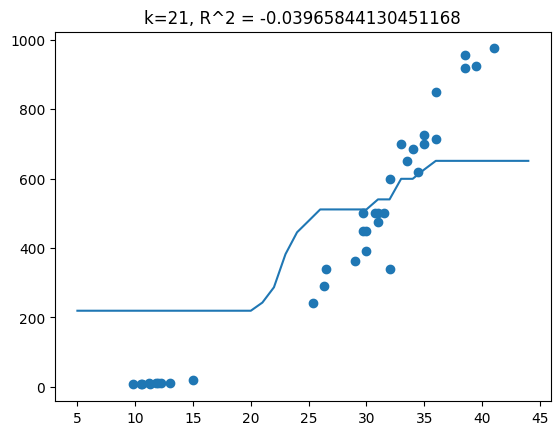

In [10]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for k in [1, 3, 5, 7, 10, 15, 21]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    #결정계수
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)

    plt.title(f'k={k}, R^2 = {s_train-s_test}')
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.show()

In [13]:
knr.n_neighbors=3 #기본값은 5
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9741964263259032
0.9543005691892875


In [14]:
for i in range(42, 51):
    prediction = knr.predict([[i]])
    print(i, prediction)

42 [951.66666667]
43 [951.66666667]
44 [951.66666667]
45 [951.66666667]
46 [951.66666667]
47 [951.66666667]
48 [951.66666667]
49 [951.66666667]
50 [951.66666667]


In [15]:
#이웃을 찾아 차트로 그리기
distance, indexes = knr.kneighbors([[50]])
print(distance, indexes)

[[ 9.  10.5 11.5]] [[32 18  4]]


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1129.13958977]


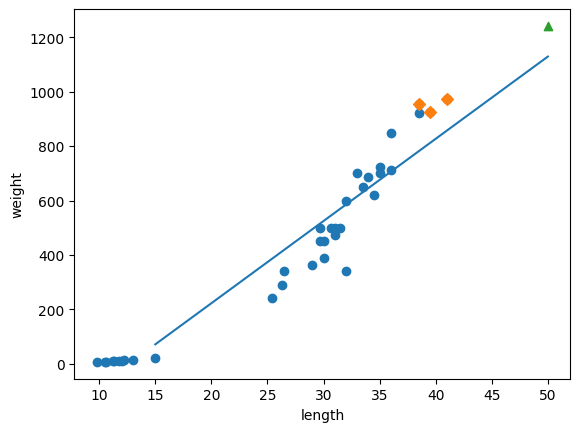

In [19]:
from sklearn.linear_model import LinearRegression
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(36, 2) (13, 2)


In [21]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))

[1746.88304451]


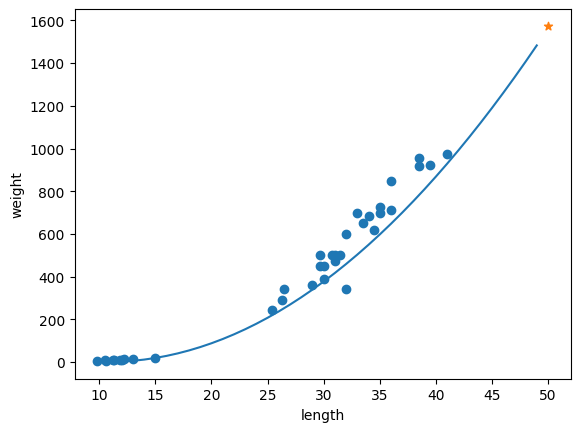

In [24]:
point = np.arange(10, 50)
plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
# 모델 저장하기
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(train_poly, train_target)

KNeighborsRegressor(n_neighbors=3)